# Preconditioned Model Building (PMB)

PMB is a method for solving differentiable unconstrained optimization problems. The method requires two arguments: a handle to the objective function, $f:\mathbb{R}^n \mapsto \mathbb{R}$ and an initial starting solution, $x_0 \in \mathbb{R}^n$. The function handle should return the function value as well as the gradient vector. There is also an optional third argument ```pars```, which is used to specify different parameters (more on this later). 

Here are six functions that we shall use for demonstrating PMB.

In [1]:
funcs = {@(x)rosenbrock(x), @(x)fletchcr(x), @(x)eg2(x), @(x)liarwhd(x), ...
         @(x)edensch(x), @(x)nonscomp(x)};
fun = funcs{1};

Let's start with the well-known ```rosenbrock```. The optimal objective function value for this function is 0.0. We first create a handle to the function and an initial starting solution.

In [2]:
fun = funcs{1}; % handle to the function
n = 10; % dimension of the problem
% initial starting solution
x0 = 5.0 + rand(n,1)*10.0;

The name of PMB solver is ```pmbsolve```.

In [3]:
pmbout = pmbsolve(fun, x0);

Function value decreases less than ftol


Here is the output structure.

In [4]:
fieldnames(pmbout)

ans = 

    'fcalls'
    'nmbs'
    'exit'
    'time'
    'x'
    'fval'
    'g'
    'niter'


The description of each field is given below:
* ```fcalls```: Total number of function calls to solve the problem
* ```nmbs```: Total number of times a model is built during the inner iterations
* ```exit```: Exit status (the associated parameters with each status is given in parantheses)
    * 1: First order condition is met (```pars.gtol```)
    * 0: Maximum number of inner iterations is reached (```pars.maxiniter```)
    * -1: Maximum number of iterations is reached (```pars.maxiter```)
    * -2: Maximum number of function calls is reached (```pars.maxfcalls```)
    * -3: Time limit is reached (```pars.maxtime```)
    * -4: Change in function value between two consecutive iterations is below tolerance (```pars.ftol```)
* ```time```: Time to solve the problem in seconds
* ```x```: Final solution
* ```g```: Final gradient at $x$
* ```niter```: Number of iterations

In [5]:
fprintf('PMB Objective Function Value: %f\n', pmbout.fval);
fprintf('PMB Final Gradient Norm Value: %f\n', norm(pmbout.g,'inf'));
fprintf('PMB Number of function calls: %d\n', pmbout.fcalls);
fprintf('Number of iterations: %d\n', pmbout.niter);
fprintf('Number of model building steps: %d\n', pmbout.nmbs);
fprintf('Time in seconds: %d', pmbout.time);

PMB Objective Function Value: 0.000000
PMB Final Gradient Norm Value: 0.001542
PMB Number of function calls: 166
Number of iterations: 117
Number of model building steps: 49
Time in seconds: 8.748678e-02


How about a large-scale version of the same problem?

In [6]:
n = 1000;
x0 = 5.0 + rand(n,1)*10.0;
pmbout = pmbsolve(fun, x0);
fprintf('PMB Objective Function Value: %f\n', pmbout.fval);
fprintf('PMB Final Gradient Norm Value: %f\n', norm(pmbout.g,'inf'));
fprintf('PMB Number of function calls: %d\n', pmbout.fcalls);
fprintf('Number of iterations: %d\n', pmbout.niter);
fprintf('Number of model building steps: %d\n', pmbout.nmbs);
fprintf('Time in seconds: %d', pmbout.time);

Function value decreases less than ftol
PMB Objective Function Value: 0.000000
PMB Final Gradient Norm Value: 0.001830
PMB Number of function calls: 155
Number of iterations: 118
Number of model building steps: 37
Time in seconds: 2.107836e-02


We can also try other functions with even larger dimensions. For instance a 100K-dimensional ```nonscomp```, whose optimal objective function value is again 0.0.

In [11]:
fun = funcs{6};
n = 100000;
x0 = 5.0 + rand(n,1)*10.0;
pmbout = pmbsolve(fun, x0);
fprintf('PMB Objective Function Value: %f\n', pmbout.fval);
fprintf('PMB Final Gradient Norm Value: %f\n', norm(pmbout.g,'inf'));
fprintf('PMB Number of function calls: %d\n', pmbout.fcalls);
fprintf('Number of iterations: %d\n', pmbout.niter);
fprintf('Number of model building steps: %d\n', pmbout.nmbs);
fprintf('Time in seconds: %d', pmbout.time);

Function value decreases less than ftol
PMB Objective Function Value: 0.000000
PMB Final Gradient Norm Value: 0.000088
PMB Number of function calls: 144
Number of iterations: 112
Number of model building steps: 32
Time in seconds: 9.043891e-01


## Options

The solver also takes an optional argument ```pars```. This parameter has the following fields. Note that the default values of the parameters are given in parantheses:

* ```M```: The memory size for the preconditioner (```5```)
* ```gtol```: The tolerance for the first-order optimality (```1.0e-5```)
* ```ftol```: The normalized difference between two consecutive function values (```1.0e-8```)
* ```display```: To display information about the progress in every iteration (```false```)
* ```message```: Shows a message about the exit condition or errors (```true```)
* ```history```: Stores the function values and the first-order errors throughout the iterations (```false```) 
* ```maxiter```: Maximum number of iterations (```1000```)
* ```maxiniter```: Maximum number of inner iterations for model building (```100```)
* ```maxfcalls```: Maximum number of function calls (```1000```)
* ```maxtime```: Maximum computation time in seconds (```3600```)

To change one of these parameters, we need to specify the value by using ```pars``` keyword defined within ```pmbsolve```. Suppose that we want to plot the progress of the objective function values when ```pmbsolve``` is called for 100-dimensional ```fletchcr``` (optimal objective function value is 0.0).

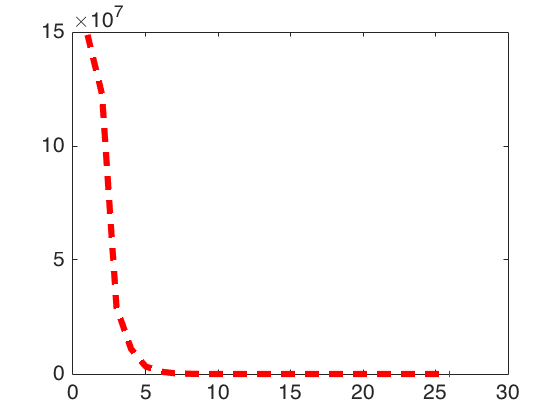

Iter: 1 ===> f = 148745460.722359 	 norm(g) = 13869.054975
Iter: 2 ===> f = 122778463.996497 	 norm(g) = 11263.101530
Iter: 3 ===> f = 29168532.065399 	 norm(g) = 3786.345254
Iter: 4 ===> f = 11007015.510744 	 norm(g) = 1626.476251
Iter: 5 ===> f = 3337127.475429 	 norm(g) = 736.414844
Iter: 6 ===> f = 1063752.691518 	 norm(g) = 273.058539
Iter: 7 ===> f = 319550.646025 	 norm(g) = 145.327445
Iter: 8 ===> f = 92114.802881 	 norm(g) = 45.165242
Iter: 9 ===> f = 23998.710534 	 norm(g) = 35.859481
Iter: 10 ===> f = 5270.940227 	 norm(g) = 16.302326
Iter: 11 ===> f = 709.171254 	 norm(g) = 6.831057
Iter: 12 ===> f = 204.005340 	 norm(g) = 16.026034
Iter: 13 ===> f = 45.795015 	 norm(g) = 6.317916
Iter: 14 ===> f = 8.315649 	 norm(g) = 1.118042
Iter: 15 ===> f = 3.109172 	 norm(g) = 0.538048
Iter: 16 ===> f = 0.724116 	 norm(g) = 0.234188
Iter: 17 ===> f = 0.157365 	 norm(g) = 0.076130
Iter: 18 ===> f = 0.013922 	 norm(g) = 0.031722
Iter: 19 ===> f = 0.004006 	 norm(g) = 0.034749
Iter: 20 =

In [18]:
fun = funcs{2};
n = 100;
x0 = 5.0 + rand(n,1)*10.0;
pars.history = true;
pars.display = true;
pmbout = pmbsolve(fun, x0, pars); % NOTE the third optional argument
plot(1:length(pmbout.fhist), pmbout.fhist, '--r', 'linewidth', 3.0)

## Matrix Factorization

As our last example, we solve a matrix factorization problem. We shall try to factorize an $n \times m$ data matrix $Y$ to obtain two matrices  $Z_1 \in \mathbb{R}^{n \times k}$ and $Z_2 \in \mathbb{R}^{k \times m}$ by solving

$$
\underset{Z1, Z2}{\min} \ \tfrac{1}{2N}\|Y - Z_1Z_2\|^2.
$$

Here, $k$ is called the _rank_ or the _latent dimension_, and $N$ is the number of nonzeros in $Y$. 

For our numerical experiment, we can use the [MovieLens data set](https://grouplens.org/datasets/movielens/) with one million ratings ($N$ = 1M). The data file is available with this repository as a zipped file ("X_3883_6040.dat.zip"). After unzipping the file, we first load the sparse data matrix, $Y$.

In [15]:
load X_3883_6040.dat
Y = spconvert(X_3883_6040);
[nrows, ncols] = size(Y);

Suppose that the latent dimension is 50. We then create a handle to the function ```matfac```, which evaluates the mean square error.

In [16]:
lat = 50; 
n = (nrows + ncols)*lat;
x0 = sqrt(randi(5, n, 1)/lat);
datasize = full(sum(sum(Y>0)));
fun = @(x)matfac(x, Y, lat, datasize);

We are ready to solve the problem. When it comes to presenting the results for the matrix factorization problem, it is common to report the root mean square error.

In [17]:
pmbout = pmbsolve(fun, x0);
fprintf('Root Mean Square Error %f\n', sqrt(2.0*pmbout.fval));
fprintf('PMB Final Gradient Norm Value: %f\n', norm(pmbout.g,'inf'));
fprintf('PMB Number of function calls: %d\n', pmbout.fcalls);
fprintf('Number of iterations: %d\n', pmbout.niter);
fprintf('Number of model building steps: %d\n', pmbout.nmbs);
fprintf('Time in seconds: %d', pmbout.time);

First order condition is within gtol
Root Mean Square Error 0.516365
PMB Final Gradient Norm Value: 0.000009
PMB Number of function calls: 329
Number of iterations: 308
Number of model building steps: 21
Time in seconds: 8.791452e+01


You can compare these results with one of the state-of-the-art incremental solvers [HAMSI-MF](https://github.com/spartensor/hamsi-mf).